In [ ]:
## imports and dependencies

# standard libraries
import shap
import numpy as np
import pandas as pd

# data split
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# models
from sklearn.ensemble import RandomForestRegressor

# accuracy
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv("tar_enc_dataset.csv")

In [ ]:
df['Ln Weekly Gross'] = df['Weekly Gross'].apply(np.log)

In [ ]:
df = df.drop(['Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ'], axis=1)

In [ ]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Random Forest Scaled
rf_scaled = RandomForestRegressor()
rf_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = rf_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (scaled):", mae_scaled)

Mean Absolute Error (scaled): 0.3796515513447396


In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

In [ ]:
# create explainer
explainer = shap.TreeExplainer(rf_scaled)
shap_values = explainer.shap_values(x)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


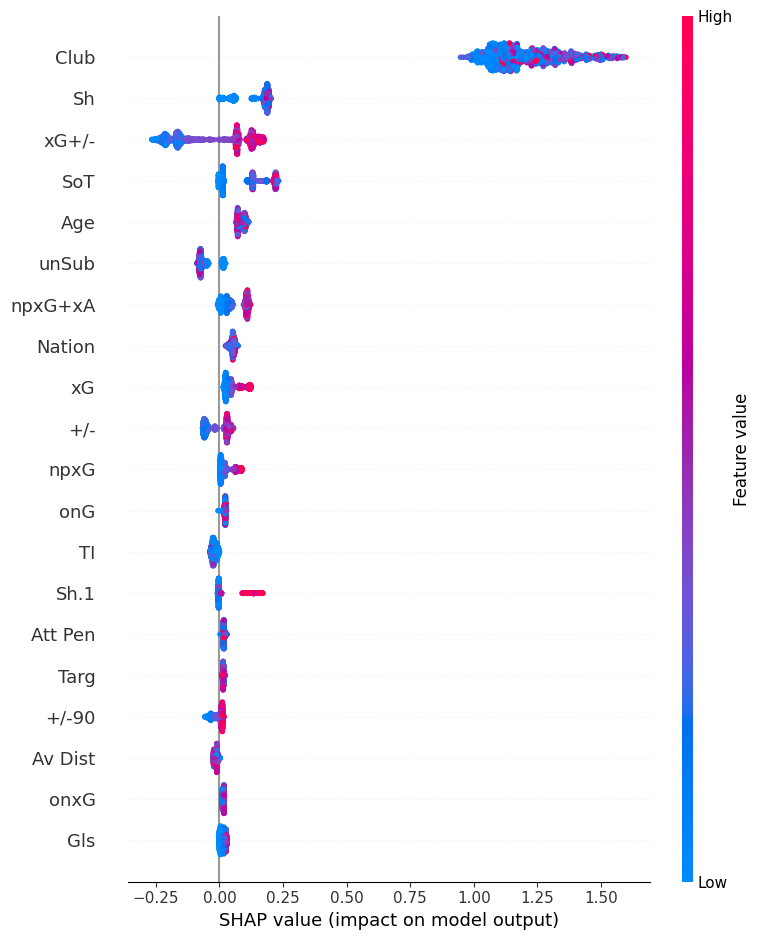

In [ ]:
# explain entire dataset
shap.initjs()
shap.summary_plot(shap_values, x)